In [1]:
import sklearn.datasets as datasets
from  sklearn.ensemble import RandomForestClassifier
import pandas as pd
import pickle
datasets = datasets.load_iris()
from sklearn.model_selection import train_test_split

In [2]:
datasets

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
datasets.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
datasets.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
irisDF = pd.DataFrame({
    "sepal_length" : datasets.data[:, 0], 
    "sepal_width" : datasets.data[: ,1],
    "petal_length" : datasets.data[: ,2],
    "petal_width" : datasets.data[:, 3],
    "species": datasets.target
})

In [6]:
irisDF

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
%%time
X_train, X_test, Y_train, Y_test = train_test_split(irisDF[["sepal_length",
                                                            "sepal_width", 
                                                            "petal_length",
                                                            "petal_width"]],
                                                    irisDF.species )
classifier = RandomForestClassifier(n_estimators=50)
classifier = classifier.fit(X_train, Y_train)
#y_pred = classifier.predict(X_test)
#y_pred

Wall time: 149 ms


In [8]:
feature_imp = pd.Series(classifier.feature_importances_, index=datasets.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.445467
petal width (cm)     0.427417
sepal length (cm)    0.089371
sepal width (cm)     0.037745
dtype: float64

In [9]:
pickle_file_dir = open("iris_petal_model.pkl", "wb")

pickle.dump(classifier, pickle_file_dir)
pickle_file_dir.close()

jika ingin digunakan kembali

In [10]:
pickleFileRead = open("./iris_petal_model.pkl", "rb")
read_classifier = pickle.load(pickleFileRead)

In [11]:
read_classifier.predict(X_test)

array([1, 0, 0, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 2, 2, 0, 1, 1, 2, 0, 1, 2, 2, 2, 2, 0])

In [12]:
pickle.dump(X_test, open("iris_xtest_data.pkl", "wb"))

setelah sepal width di hapus

In [13]:
X = irisDF[["petal_length", "petal_width", "sepal_length"]]
y = irisDF["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

In [14]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

#predict on test set
y_pred = clf.predict(X_test)

In [15]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


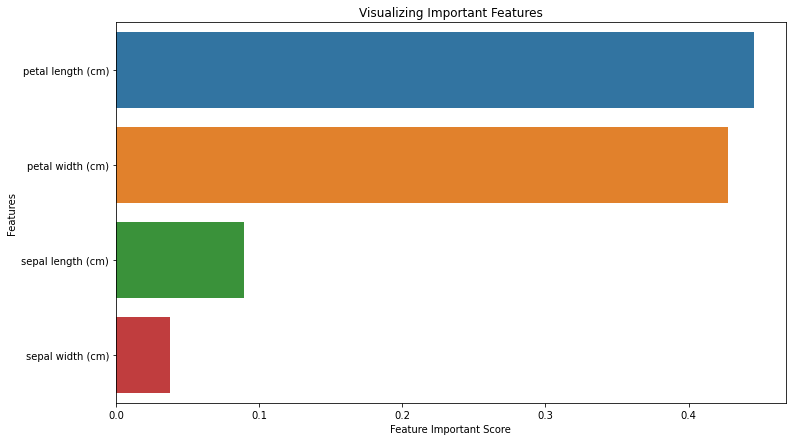

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Important Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")

plt.show()

In [17]:
pwd

'C:\\Users\\resty\\Hacktiv8\\Class\\session_class\\Sesi_13'

In [19]:
datasets.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3